# Gráficos con Python: plots y matplotlib
------------------------------------------------------


### Data Fundamentals con Python

#### Enero 2023

**Aurora Cobo Aguilera**

**The Valley**

------------------------------------------------------

## Plots de dataframes

En el siguiente notebook vamos a ver algunos ejemplos de gráficas de las miles de opciones que nos brinda Python.

Primero importamos librerías.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

A continuación, cargamos el dataset en un dataframe.

In [ ]:
titanic = pd.read_csv('train.csv')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Como encontramos un campo que es un identificador de paciente, podemos asignar esa columna como el nuevo índice de la tabla.

In [ ]:
titanic = titanic.set_index('PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Gráfica tipo *pie*

En primer lugar vamos a ver un ejemplo de una gráfica de tipo *pie* que nos represente el número de observaciones del sexo femenino y del masculino. Para ello, antes de nada, tenemos que separar ambos subconjuntos.

In [ ]:
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

El gráfico se crea con el comando *plt.pie* de la librería *matplotlib*. Fíjate que hay muchos parámetros posibles para elegir las etiquetas de las muestras dibujadas, los colores, el tamaño, etc.

> **Ejercicio**: Ejecuta varias veces la siguiente celda cambiando los parámetros. Puedes buscar acerca de la librería para entender qué significa cada uno de ellos.

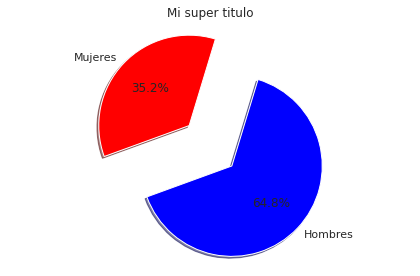

In [ ]:
# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Hombres', 'Mujeres'],
    
    # with no shadows
    shadow = True,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0.5),
    
    # with the start angle at 90%
    startangle = 200,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Mi super titulo")

# View the plot
plt.tight_layout()
plt.show()

### Gráfico de nube de puntos

*seaborn* es otra librería que nos permite realizar gráficas. En este caso, *lmplot* es un gráfico disperso o de nube de puntos.

> **Ejercicio**: Comprueba a ejecutar y luego a descomentar las últimas 3 líneas y volver a ejecutar. ¿Cuáles son las diferencias? ¿Qué función tienen esos comandos?

(25.0, 40.0)

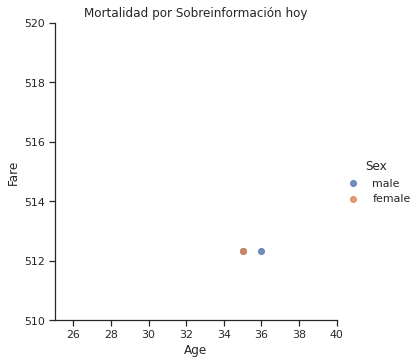

In [ ]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Mortalidad por Sobreinformación hoy')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(510,520)
axes[0,0].set_xlim(25,40)

### Gráfico de un histograma

Por último, vamos a representar un histograma con datos de nuestro ejemplo. Vamos a usar los datos de la tarifa (*fare*). 

Vamos a verlos ordenados, aunque no haría falta ordenarlos para pintar el histograma.

In [ ]:
df = titanic.Fare.sort_values(ascending = False)
df

PassengerId
259    512.3292
738    512.3292
680    512.3292
89     263.0000
28     263.0000
         ...   
634      0.0000
414      0.0000
823      0.0000
733      0.0000
675      0.0000
Name: Fare, Length: 891, dtype: float64

Creamos los intervalos del histograma.

In [ ]:
# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590])

Para dibujar el plot hace falta usar el comando *plt.hist*. Fíjate en las opciones y comandos extra.

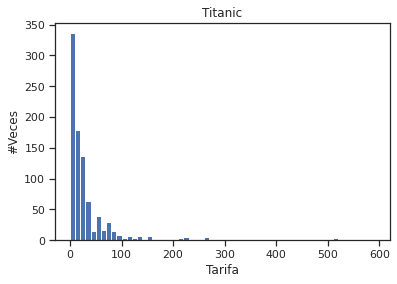

In [ ]:
# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Tarifa')
plt.ylabel('#Veces')
plt.title('Titanic')

# show the plot
plt.show()

Te dejo que investiges más opciones en la web con la librería de *matplotlib*.

Pero antes de acabar este apartado,

> **Ejercicio**: ¿Podrías decirme cuántas personas sobrevivieron según este dataset?

In [ ]:
#<SOL>
sobreviviente = (titanic['Survived'] == 1).sum()
print(sobreviviente)
#</SOL>

342


> **Ejercicio**: ¿Quiénes tenían la tarifa más cara? Pista: Ya sabes cuál es la más cara al haber ordenado antes las observaciones.

In [ ]:
#<SOL>
maximo=max(titanic['Fare'])
ricos = titanic[titanic['Fare'] == maximo]
print(ricos)
#</SOL>

             Survived  Pclass                                Name     Sex  \
PassengerId                                                                 
259                 1       1                    Ward, Miss. Anna  female   
680                 1       1  Cardeza, Mr. Thomas Drake Martinez    male   
738                 1       1              Lesurer, Mr. Gustave J    male   

              Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
PassengerId                                                                
259          35.0      0      0  PC 17755  512.3292          NaN        C  
680          36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
738          35.0      0      0  PC 17755  512.3292         B101        C  


### Gráficos de una curva

Por último, en el siguiente ejemplo, dibujamos dos sinusoides con diferentes símbolos. 

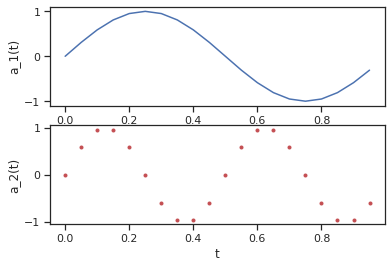

In [ ]:
t = np.arange(0.0, 1.0, 0.05) #del 0 al 1 cada 0.05
a1 = np.sin(2*np.pi*t)
a2 = np.sin(4*np.pi*t)


plt.figure()
ax1 = plt.subplot(211)
ax1.plot(t,a1)
plt.xlabel('t')
plt.ylabel('a_1(t)')
ax2 = plt.subplot(212)
ax2.plot(t,a2, 'r.')
plt.xlabel('t')
plt.ylabel('a_2(t)')
plt.show()

> **Ejercicio**: Define dos lista de puntos, una para el eje x y otra para el eje y. Después, realiza el gráfico de la curva asociada a dichos puntos con la función *plot()* de *matplotlib*.

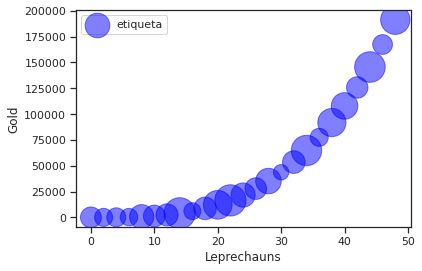

Generator(PCG64)


0.5166904023304625

In [ ]:
# <SOL>
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.arange(0.0, 50.0, 2)
y = x ** np.pi + np.random.rand(*x.shape) * 30
sizes = np.random.rand(*x.shape) * 800 + 200

fig, ax = plt.subplots()
ax.scatter(x, y, sizes, c="blue", alpha=0.5,label="etiqueta")
ax.set_xlabel("Leprechauns")
ax.set_ylabel("Gold")
ax.legend()
plt.show()
# </SOL>
rng = np.random.default_rng(10000)
print(rng)
rfloat = rng.random()
rfloat